In [1]:
import sys
import dlib
import openface
from skimage import io
import numpy as np

In [2]:
#Reading the image data into numpy
def rgb2gray(rgb):
    return np.dot(rgb[:,:,:], [0.299, 0.587, 0.114])

In [7]:
def load_data():
    import pandas as pd
    import numpy as np
    from PIL import Image
    from termcolor import colored
    
    train = pd.read_csv('/home/mckc/All Data/train.csv')
    test = pd.read_csv('/home/mckc/All Data/test.csv')
    print 'the training data shape is ',train.shape
    print 'the test data shape is ', test.shape
    
    X_tr = np.zeros((1,136),dtype=np.uint8)
    Y_tr=[]
    for i in range(train.shape[0]):
        image = np.array(Image.open(train.values[i,0]))
        landmarks = get_landmarks(image)
        if landmarks is not None:
            X_tr =  np.vstack((X_tr,landmarks))
            Y_tr = np.append(Y_tr,train.values[i,1])
        if i % 50==0:
            print colored((float(i)/train.shape[0]*100 ,' Percentage complete'), 'green')
    
    X_tr = X_tr[1:,:]
    X_ts = np.zeros((1,136),dtype=np.uint8)
    Y_ts=[]
    
    for i in range(test.shape[0]):
        image = np.array(Image.open(test.values[i,0]))
        landmarks = get_landmarks(image)
        if landmarks is not None:
            X_ts =  np.vstack((X_ts,landmarks))
            Y_ts = np.append(Y_ts,test.values[i,1])
            
        if i % 50==0:
            print colored((float(i)/test.shape[0]*100 ,' Percentage complete'), 'green')
    X_ts = X_ts[1:,:]
    
    print 'the training file shape',X_tr.shape,Y_tr.shape
    print 'the testing file shape',X_ts.shape,Y_ts.shape
    
    return X_tr,X_ts,Y_tr,Y_ts    

In [4]:
def simulate(X,Y):
    import scipy as sp
    import scipy.ndimage
    complete = np.zeros((1,96,96),dtype=np.uint8)
    Y_complete = []
    for i in range(len(X)):
        complete = np.vstack((complete,X[i,:,:].reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = 5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = 10,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = 15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = -5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = -15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(X[i,:,:], angle = -10,reshape=False,cval=1).reshape(1,96,96)))
        rotated = np.fliplr(X[i,:,:])
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 10,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = 15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -5,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -10,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,scipy.ndimage.rotate(rotated, angle = -15,reshape=False,cval=1).reshape(1,96,96)))
        complete = np.vstack((complete,rotated.reshape(1,96,96)))
        Y_complete = np.append(Y_complete,([Y[i]]*14))
        if i % 10==0:
            print colored((float(i)/len(X)*100 ,' Percentage complete'),'green')
    complete = complete[1:,:,:]
    return complete,Y_complete

In [136]:
def get_landmarks(im):
    predictor_model = "/home/mckc/Downloads/shape_predictor_68_face_landmarks.dat"

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_model)
    rects = detector(im, 1)
    
    if len(rects) > 1:
        print 'TooManyFaces'
        return None
    if len(rects) == 0:
        print 'NoFaces'
        return None
    coords = np.array([[p.x, p.y] for p in predictor(im, rects[0]).parts()])
    centroid = coords.mean(axis=0)
    return ((coords - centroid )).reshape(1,136)

In [137]:
X_tr,X_tst,Y_tr,Y_tst = load_data()

the training data shape is  (586, 2)
the test data shape is  (195, 2)
(0.0, ' Percentage complete')
NoFaces
(8.532423208191126, ' Percentage complete')
(17.064846416382252, ' Percentage complete')
(25.597269624573375, ' Percentage complete')
(34.129692832764505, ' Percentage complete')
(42.66211604095563, ' Percentage complete')
(51.19453924914675, ' Percentage complete')
NoFaces
(59.72696245733788, ' Percentage complete')
(68.25938566552901, ' Percentage complete')
(76.79180887372013, ' Percentage complete')
(85.32423208191126, ' Percentage complete')
(93.85665529010238, ' Percentage complete')
(0.0, ' Percentage complete')
(25.64102564102564, ' Percentage complete')
(51.28205128205128, ' Percentage complete')
(76.92307692307693, ' Percentage complete')
the training file shape (584, 136) (584,)
the testing file shape (195, 136) (195,)


In [138]:
def standard(X):
    return (X - X.mean())/X.max()

X_tst = standard(X_tst)
X_tr = standard(X_tr)

In [139]:
X_tr.shape,Y_tr.shape

((584, 136), (584,))

In [140]:
X_tr[1,:]

array([-0.71612952, -0.35313884, -0.70228094, -0.15752762, -0.66939056,
        0.03115931, -0.62611374,  0.21292195, -0.56206405,  0.38602922,
       -0.44954432,  0.52970826, -0.30759635,  0.63703477, -0.13102693,
        0.7114709 ,  0.06285322,  0.72185734,  0.25154015,  0.68723588,
        0.40560562,  0.59548903,  0.5215875 ,  0.46912072,  0.60121684,
        0.31332417,  0.63237615,  0.13675475,  0.64276259, -0.04500789,
        0.64622473, -0.23196375,  0.63237615, -0.41718853, -0.63996232,
       -0.4829693 , -0.55513976, -0.58164045, -0.41838501, -0.59029581,
       -0.28336134, -0.55567435, -0.15179981, -0.5020111 ,  0.08189502,
       -0.49681788,  0.20307011, -0.54875006,  0.32943842, -0.59029581,
        0.45926888, -0.58856474,  0.54409144, -0.50547324, -0.02370042,
       -0.39295352, -0.00812077, -0.27177842,  0.00745889, -0.15579655,
        0.02476961, -0.03289038, -0.14487552,  0.0761672 , -0.0635151 ,
        0.09347793,  0.02130747,  0.11251973,  0.09401252,  0.08

In [141]:
map, Y_number = np.unique(Y_tr, return_inverse=True)
Y_test_number = np.unique(Y_tst, return_inverse=True)[1]

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = LogisticRegression(verbose=0,n_jobs=-1,multi_class='multinomial',solver='lbfgs',max_iter=500,warm_start=True)
clf.fit(X_tr,Y_number)
Y_logictic= clf.predict(X_tst)
Y_log_vales = map[Y_logictic]

print 'Accuracy of the model is ',accuracy_score(Y_tst,Y_log_vales)
confusion_matrix(Y_tst,Y_log_vales)

Accuracy of the model is  0.887179487179


array([[24,  0,  0,  0,  0,  0,  1],
       [ 0, 18,  0,  0,  1,  2,  4],
       [ 0,  0, 20,  4,  0,  1,  1],
       [ 0,  0,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  1],
       [ 0,  0,  1,  0,  0, 20,  4],
       [ 0,  0,  1,  0,  1,  0, 40]])

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

recognizer = RandomForestClassifier(500,verbose=0,oob_score=True,n_jobs=-1,max_features=20)
recognizer.fit(X_tr,Y_number)
Y_rf= recognizer.predict(X_tst)
Y_rf_vales = map[Y_rf]

print 'Accuracy of the model is ',accuracy_score(Y_tst,Y_rf_vales)
confusion_matrix(Y_tst,Y_rf_vales)

Accuracy of the model is  0.938461538462


array([[25,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  1,  1,  0],
       [ 0,  0, 24,  2,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0, 24,  0,  3],
       [ 0,  0,  0,  0,  0, 22,  3],
       [ 0,  0,  1,  0,  1,  0, 40]])

In [143]:
from keras.models import Sequential
from keras.layers import Dense, Activation,LSTM
from keras import backend as K
from keras.optimizers import Adam,SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
from keras.layers import Merge

left_branch = Sequential()
left_branch.add(Dense(1000, input_dim=136,activation='relu'))

right_branch = Sequential()
right_branch.add(Dense(50, input_dim=136,activation='sigmoid'))

merged = Merge([left_branch, right_branch], mode='concat')

final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(7,activation='softmax'))

final_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'],lr=0.0001)
final_model.fit([X_tr,X_tr], Y_Keras,nb_epoch=100, batch_size=1,verbose=1,
          validation_split=0.2, callbacks=[early_stopping])
y_keras = map[final_model.predict_classes([X_tst,X_tst])]

print '/n Accuracy of the model is ',accuracy_score(Y_tst,y_keras)
confusion_matrix(Y_tst,y_keras)

Train on 467 samples, validate on 117 samples
Epoch 1/100
467/467 [==============================] - 1s - loss: 1.9404 - acc: 0.2227 - val_loss: 1.6014 - val_acc: 0.4701
Epoch 2/100
467/467 [==============================] - 1s - loss: 1.6298 - acc: 0.3640 - val_loss: 1.4222 - val_acc: 0.3846
Epoch 3/100
467/467 [==============================] - 1s - loss: 1.4212 - acc: 0.4604 - val_loss: 1.2187 - val_acc: 0.4188
Epoch 4/100
467/467 [==============================] - 1s - loss: 1.3118 - acc: 0.5139 - val_loss: 1.1476 - val_acc: 0.4701
Epoch 5/100
467/467 [==============================] - 1s - loss: 1.2386 - acc: 0.5418 - val_loss: 1.1854 - val_acc: 0.5043
Epoch 6/100
467/467 [==============================] - 1s - loss: 1.1668 - acc: 0.5760 - val_loss: 1.1895 - val_acc: 0.4701
Epoch 7/100
467/467 [==============================] - 1s - loss: 1.1156 - acc: 0.5910 - val_loss: 0.8784 - val_acc: 0.7350
Epoch 8/100
467/467 [==============================] - 1s - loss: 1.1053 - acc: 0.5996

array([[25,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  1,  3,  1],
       [ 1,  0, 23,  0,  0,  2,  0],
       [ 0,  0,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0],
       [ 0,  0,  1,  0,  3,  0, 38]])

In [116]:
from keras.models import Sequential
from keras.layers import Dense, Activation,LSTM
from keras import backend as K
from keras.optimizers import Adam,SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


Y_Keras = np_utils.to_categorical(Y_number, 7)
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
model = Sequential()
#model.add(LSTM(1000, input_dim=136,activation='relu'))
model.add(Dense(1000, input_dim=136,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5000,activation='relu'))
#model.add(Dense(1000,activation='relu'))
model.add(Dense(7,activation='softmax'))
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

import time
model.fit(X_tr, Y_Keras, nb_epoch=100, batch_size=5,verbose=1,
          validation_split=0.2, callbacks=[early_stopping])

y_keras = map[model.predict_classes(X_tst)]

print 'Accuracy of the model is ',accuracy_score(Y_tst,y_keras)
confusion_matrix(Y_tst,y_keras)

Train on 467 samples, validate on 117 samples
Epoch 1/100
467/467 [==============================] - 5s - loss: 1.8632 - acc: 0.2698 - val_loss: 2.1192 - val_acc: 0.1282
Epoch 2/100
467/467 [==============================] - 5s - loss: 1.5615 - acc: 0.3683 - val_loss: 1.2656 - val_acc: 0.5043
Epoch 3/100
467/467 [==============================] - 4s - loss: 1.4058 - acc: 0.4433 - val_loss: 1.0340 - val_acc: 0.6239
Epoch 4/100
467/467 [==============================] - 5s - loss: 1.3048 - acc: 0.4818 - val_loss: 1.3190 - val_acc: 0.3675
Epoch 5/100
467/467 [==============================] - 5s - loss: 1.2756 - acc: 0.4946 - val_loss: 0.9859 - val_acc: 0.6154
Epoch 6/100
467/467 [==============================] - 5s - loss: 1.2067 - acc: 0.5075 - val_loss: 1.1030 - val_acc: 0.4701
Epoch 7/100
467/467 [==============================] - 5s - loss: 1.1470 - acc: 0.5439 - val_loss: 0.9779 - val_acc: 0.7009
Epoch 8/100
467/467 [==============================] - 5s - loss: 1.0658 - acc: 0.6039

array([[19,  0,  0,  5,  1,  0,  0],
       [ 0, 20,  0,  0,  0,  4,  1],
       [ 0,  0, 23,  2,  1,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  1],
       [ 0,  0,  0,  0, 27,  0,  0],
       [ 0,  1,  0,  0,  0, 23,  1],
       [ 0,  1,  1,  0,  1,  0, 39]])

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

model = VGG_16()
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [14]:
from PIL import Image
image = np.array(Image.open('/home/mckc/Downloads/1.jpg'))
predictor_model = "/home/mckc/Downloads/shape_predictor_68_face_landmarks.dat"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_model)
rects = detector(image, 1)
    
if len(rects) > 1:
    print 'TooManyFaces'
if len(rects) == 0:
    print 'NoFaces'
coords = np.array([[p.x, p.y] for p in predictor(image, rects[0]).parts()])
centroid = coords.mean(axis=0)

In [38]:
a = np.array(rects[0])

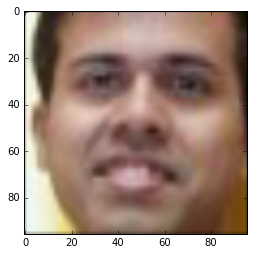

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.transform import resize

plt.imshow(resize(image[44:95,72:124],(96,96)))